## Ligand Binding Data - EDock

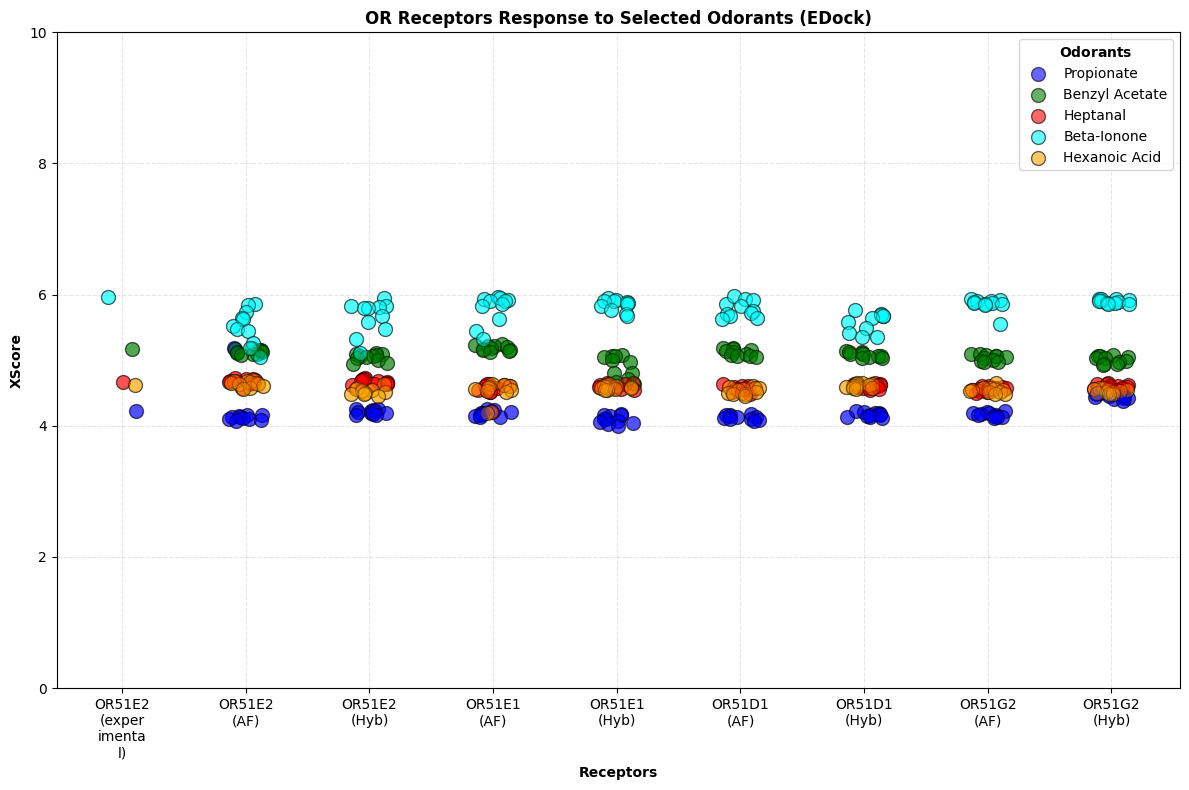

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Read the dataset
df = pd.read_csv('Edock.csv')


def add_jitter(arr, jitter_width=0.3):  # Increased jitter width
    jitter = (np.random.rand(len(arr)) - 0.5) * jitter_width
    return arr + jitter


# Re-run the plotting code with textwrap imported

# Create a dictionary to map receptor names to numerical x-axis values
unique_receptors = df['Receptors'].unique()
receptor_to_x = {receptor: i for i, receptor in enumerate(unique_receptors)}

# Mapping the 'Receptors' to their numerical x-axis values
df['x_values'] = df['Receptors'].map(receptor_to_x)

# Prepare the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define a color for each odorant
colors = ['blue', 'green', 'red', 'cyan', 'orange']

# Plot each odorant with jitter
for i, odorant in enumerate(df.columns[1:-1]):  # Skip the first column ('Receptors') and last column ('x_values')
    # Apply jitter to the x-axis values
    x_values_jittered = add_jitter(df['x_values'])
    y_values = df[odorant]
    # Scatter plot with larger dots
    ax.scatter(x_values_jittered, y_values, alpha=0.6, c=colors[i], edgecolors='black', marker='o', s=100, label=odorant)
    # Line plot connecting the dots with lighter opacity
    ax.plot(x_values_jittered, y_values, alpha=0.2, c=colors[i], marker='o', ms=10, mec='black', mew=0.5, linestyle='')

# Formatting the plot
ax.set_ylabel('XScore', fontweight='bold')
ax.set_xlabel('Receptors', fontweight='bold')
ax.set_title('OR Receptors Response to Selected Odorants (EDock)', fontweight='bold')
ax.legend(title=r"$\bf{Odorants}$", loc='upper right')

# Set the y-axis to have a fixed scale
ax.set_ylim([0, 10])

# Set x-axis ticks and labels
ax.set_xticks(range(len(unique_receptors)))

# Format the x-axis labels to be on separate lines
split_labels = [textwrap.fill(label, 6) for label in unique_receptors]
ax.set_xticklabels(split_labels, ha='center')

# Tight layout to fit the x-axis labels
plt.tight_layout()

# Show grid
plt.grid(True, alpha=0.2, linestyle='--', color='gray')


plt.savefig("OR_Odorant_EDock.png", dpi=600)

# Show the plot
plt.show()


## Ligand binding data - Gnina


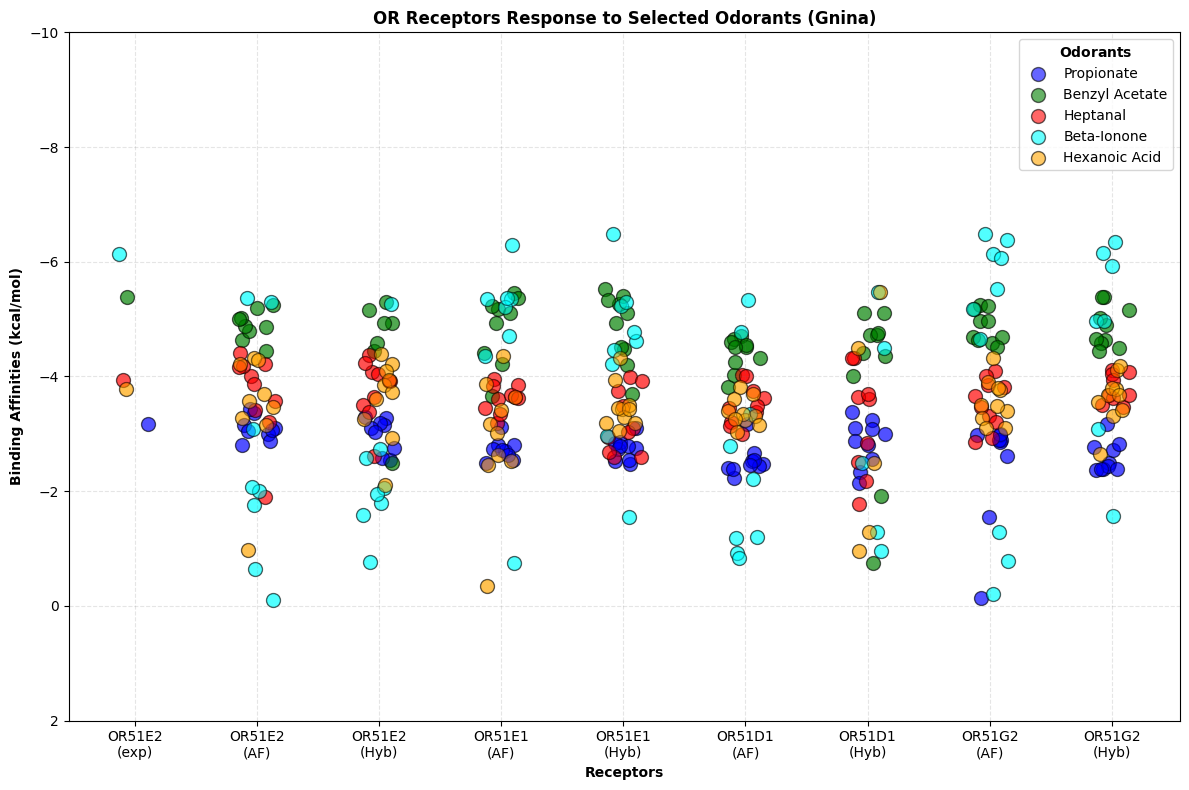

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Read the dataset
df = pd.read_csv('Gnina_all.csv')


def add_jitter(arr, jitter_width=0.3):  # Increased jitter width
    jitter = (np.random.rand(len(arr)) - 0.5) * jitter_width
    return arr + jitter


# Re-run the plotting code with textwrap imported

# Create a dictionary to map receptor names to numerical x-axis values
unique_receptors = df['Receptors'].unique()
receptor_to_x = {receptor: i for i, receptor in enumerate(unique_receptors)}

# Mapping the 'Receptors' to their numerical x-axis values
df['x_values'] = df['Receptors'].map(receptor_to_x)

# Prepare the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define a color for each odorant
colors = ['blue', 'green', 'red', 'cyan', 'orange']

# Plot each odorant with jitter
for i, odorant in enumerate(df.columns[1:-1]):  # Skip the first column ('Receptors') and last column ('x_values')
    # Apply jitter to the x-axis values
    x_values_jittered = add_jitter(df['x_values'])
    y_values = df[odorant]
    # Scatter plot with larger dots
    ax.scatter(x_values_jittered, y_values, alpha=0.6, c=colors[i], edgecolors='black', marker='o', s=100, label=odorant)
    # Line plot connecting the dots with lighter opacity
    ax.plot(x_values_jittered, y_values, alpha=0.2, c=colors[i], marker='o', ms=10, mec='black', mew=0.5, linestyle='')

# Formatting the plot
ax.set_ylabel('Binding Affinities (kcal/mol)', fontweight='bold')
ax.set_xlabel('Receptors', fontweight='bold')
ax.set_title('OR Receptors Response to Selected Odorants (Gnina)', fontweight='bold')
ax.legend(title=r"$\bf{Odorants}$", loc='upper right')

# Set the y-axis to have a fixed scale
ax.set_ylim([2, -10])

# Set x-axis ticks and labels
ax.set_xticks(range(len(unique_receptors)))

# Format the x-axis labels to be on separate lines
split_labels = [textwrap.fill(label, 6) for label in unique_receptors]
ax.set_xticklabels(split_labels, ha='center')

# Tight layout to fit the x-axis labels
plt.tight_layout()

# Show grid
plt.grid(True, alpha=0.2, linestyle='--', color='gray')


plt.savefig("OR_Odorant_Gninapng", dpi=600)

# Show the plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19560\2088891964.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(df))


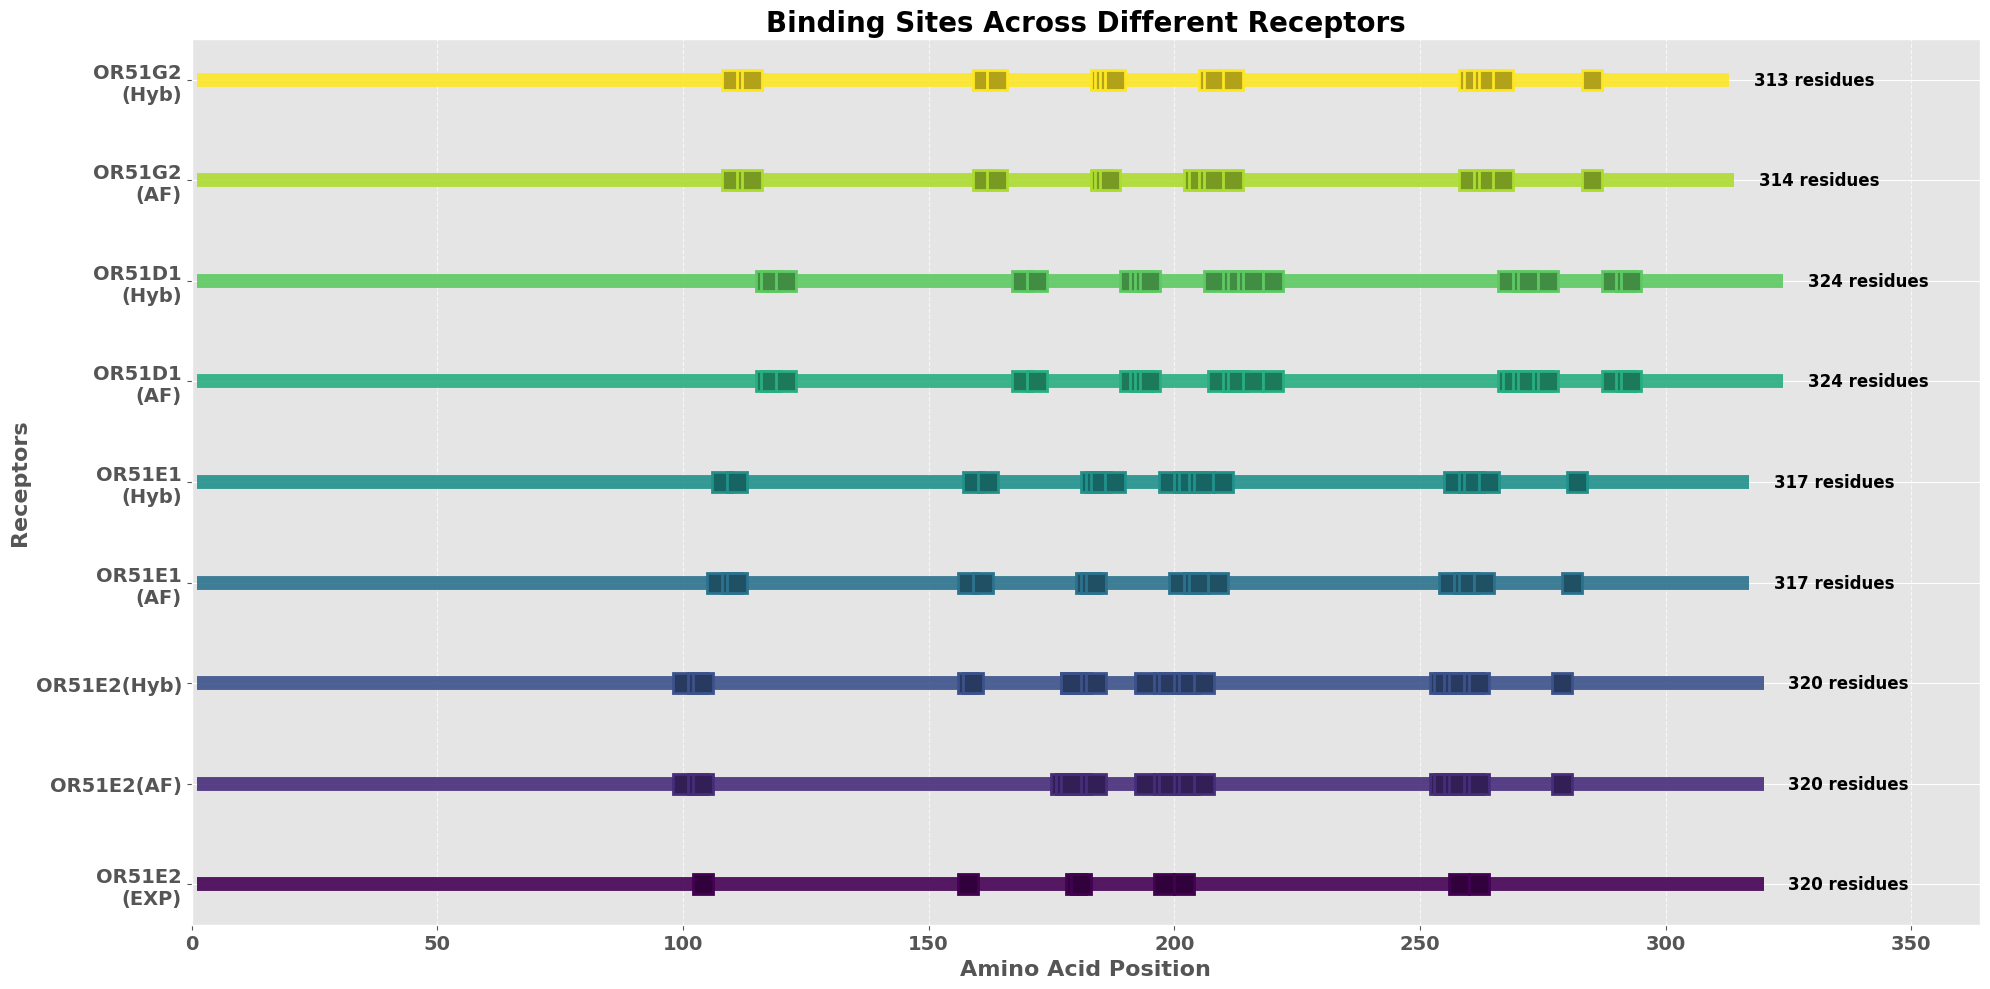

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Activate a modern-looking style
plt.style.use('ggplot')

# Function to darken a color
def darken_color(color, factor=0.7):
    # Convert the color to RGB format and darken it
    rgb = plt.cm.colors.to_rgb(color)
    return [factor * c for c in rgb]

# Read the CSV file
file_path = 'binding_site_data.csv'
df = pd.read_csv(file_path)

# Function to convert binding site string to a list of integers
def parse_sites(site_string):
    return [int(x.strip()) for x in site_string.split(',')]

# Initialize a figure
plt.figure(figsize=(20, 10))

# Colors for each receptor
colors = plt.cm.get_cmap('viridis', len(df))

# Plotting
for index, (receptor, row) in enumerate(df.iterrows()):
    total_length = int(row['Total Length[amino acid]'])
    binding_sites = parse_sites(row['Binding site'])
    receptor_color = colors(index)

    # Plot a line for the full length of the receptor
    plt.hlines(y=index, xmin=1, xmax=total_length, color=receptor_color, alpha=0.9, linewidth=10)

    # Darker shade for markers
    darker_shade = darken_color(receptor_color)

    # Add square markers for the binding sites
    plt.plot(binding_sites, [index] * len(binding_sites), 's', color=darker_shade, markeredgecolor=receptor_color, markersize=15, markeredgewidth=2)

    # Display the total number of residues next to the line
    plt.text(total_length + 5, index, f"{total_length} residues", verticalalignment='center', fontsize=12, fontweight='bold')

# Finalizing the plot
plt.title("Binding Sites Across Different Receptors", fontsize=20, fontweight='bold')
plt.xlabel("Amino Acid Position", fontsize=16, fontweight='bold')
plt.ylabel("Receptors", fontsize=16, fontweight='bold')
plt.yticks(range(len(df)), df['Receptor'], fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.xlim(0, df['Total Length[amino acid]'].max() + 40)  # Adjust xlim to accommodate text
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Saving the plot with high resolution
plt.savefig("receptor_binding_sites.png", dpi=600)

plt.show()


## BINDING SITE TOOLS - Compared 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5196\1100024752.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('cool', len(df))
) missing from current font.Temp\ipykernel_5196\1100024752.py:53: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.Temp\ipykernel_5196\1100024752.py:56: UserWarning: Glyph 13 (
  plt.savefig("receptor_binding_sites_highlighted.png", dpi=600)
) missing from current font.\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


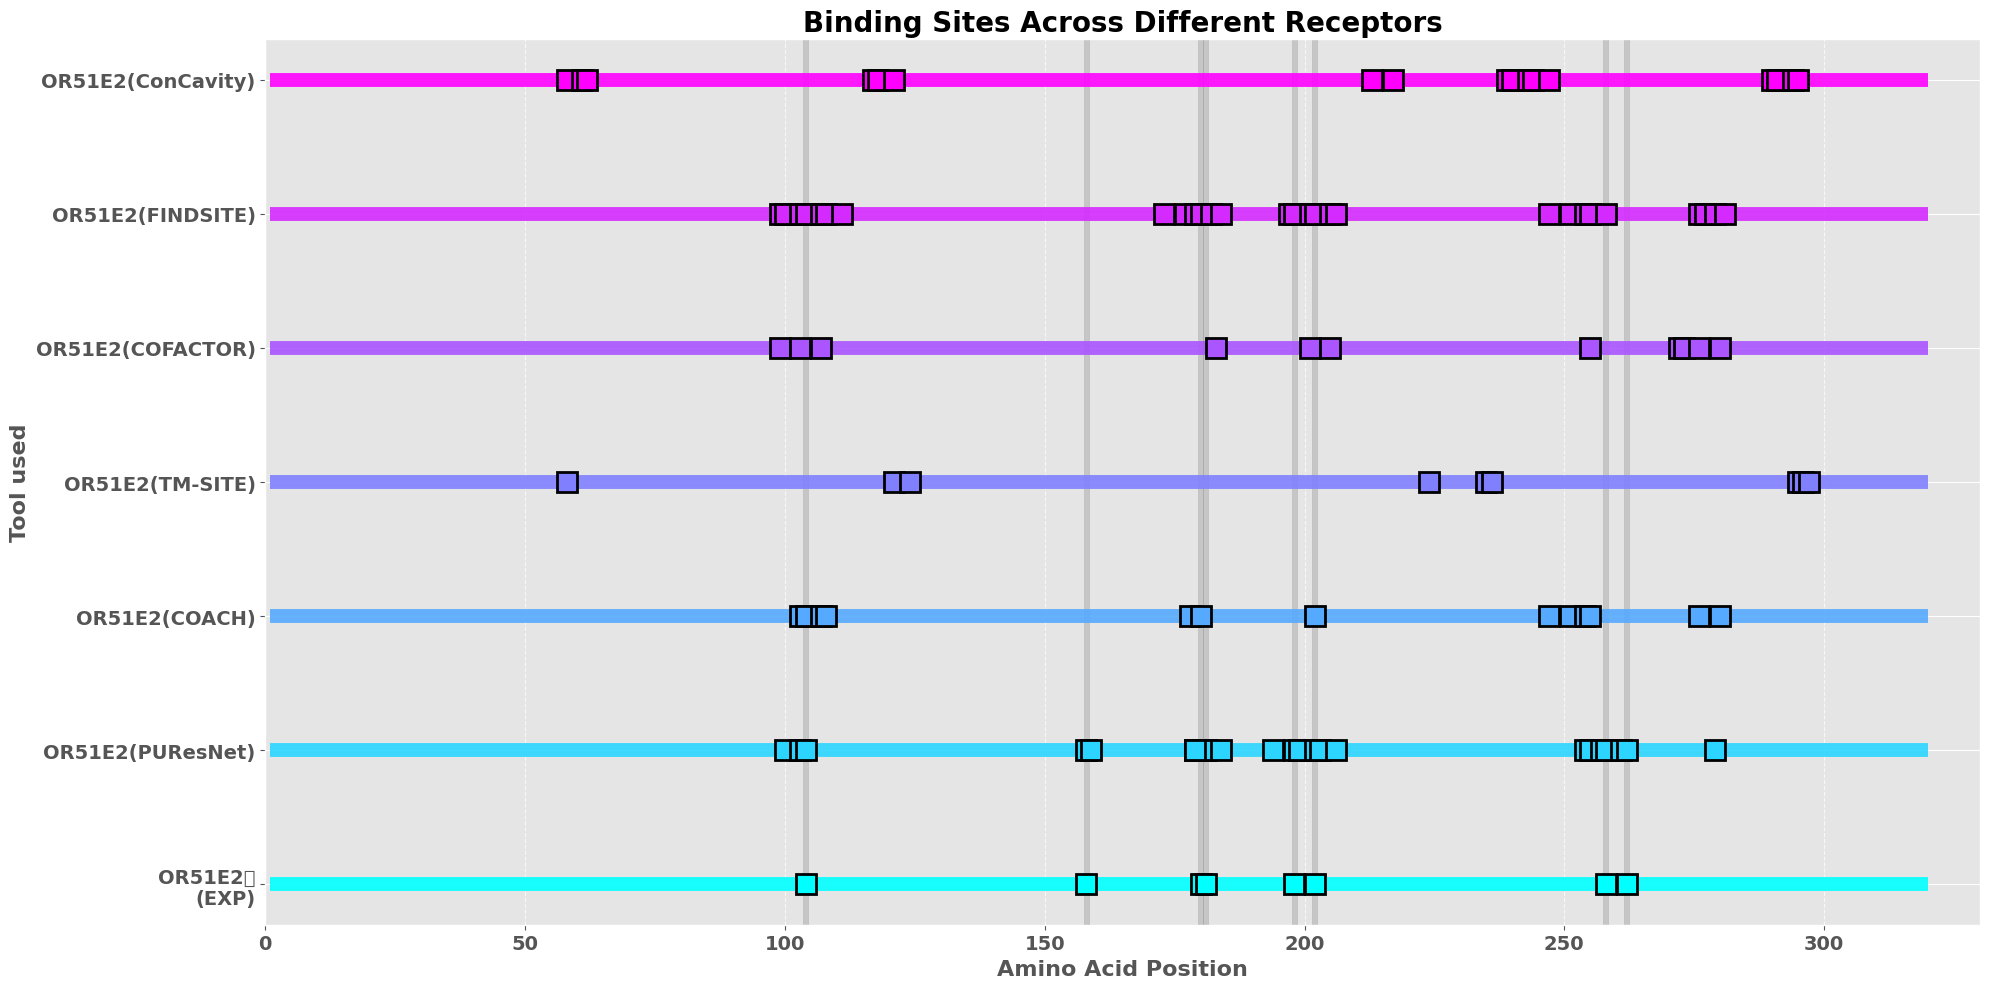

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Activate a modern-looking style
plt.style.use('ggplot')

# Main binding sites from the experimental data
main_binding_sites = [104, 158, 180, 181, 198, 202, 258, 262]

# Function to convert binding site string to a list of integers
def parse_sites(site_string):
    return [int(x.strip()) for x in site_string.split(',')]

# Read the CSV file
file_path = 'Binding_site_tools.csv'
df = pd.read_csv(file_path)

# Initialize a figure and get the current axis
plt.figure(figsize=(20, 10))
ax = plt.gca()

# Highlighting the background for main binding sites
for site in main_binding_sites:
    ax.axvspan(site - 0.5, site + 0.5, color='grey', alpha=0.3)

# Colors for each receptor, changing to a blue-purple colormap
colors = plt.cm.get_cmap('cool', len(df))

# Plotting
for index, row in df.iterrows():
    total_length = int(row['Total Length[amino acid]'])
    binding_sites = parse_sites(row['Binding site'])
    tool_name = row['Tools']
    receptor_color = colors(index)
    linewidth = 10
    markersize = 15

    # Plot a line for the full length of the receptor
    ax.hlines(y=index, xmin=1, xmax=total_length, color=receptor_color, alpha=0.9, linewidth=linewidth)

    # Add square markers for the binding sites
    ax.plot(binding_sites, [index] * len(binding_sites), 's', color=receptor_color, markeredgecolor='black', markersize=markersize, markeredgewidth=2)

# Finalizing the plot
plt.title("Binding Sites Across Different Receptors", fontsize=20, fontweight='bold')
plt.xlabel("Amino Acid Position", fontsize=16, fontweight='bold')
plt.ylabel("Tool used", fontsize=16, fontweight='bold')
plt.yticks(range(len(df)), df['Tools'], fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.xlim(0, df['Total Length[amino acid]'].max() + 10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Saving the plot with high resolution
plt.savefig("receptor_binding_sites_highlighted.png", dpi=600)

plt.show()
